In [44]:
%run cone.py

In [2]:
from matplotlib import cm

color = cm.get_cmap("RdPu")
oiii_corrs = np.loadtxt("corr")
oiii_corrs_x = np.loadtxt("corr_x_")
corr_min = np.min(oiii_corrs)

In [3]:
cors_std = np.loadtxt("../src/cors_std")

In [4]:
cors_x = np.loadtxt("../src/cors_x")[0]
cors_s = np.loadtxt("../src/cors_s")[0]

In [5]:
cors_x_err = np.loadtxt("../src/cors_x")[1]
cors_s_err = np.loadtxt("../src/cors_s")[1]

In [122]:
corr_min

-0.19618814710905794

In [7]:
np.min(oiii_corrs), np.where(oiii_corrs == np.min(oiii_corrs))

(-0.19618814710905794, (array([7]),))

In [8]:
np.min(cors_x), np.where(cors_x == np.min(cors_x))

(-0.11526146837055426, (array([1]),))

In [9]:
np.min(cors_s), np.where(cors_s == np.min(cors_s))

(-0.1321547374575117, (array([5]),))

In [10]:
cors_unbias = oiii_corrs - 0.05
np.min(cors_unbias), np.where(cors_unbias == np.min(cors_unbias))

(-0.24618814710905795, (array([7]),))

In [11]:
r = []
for i in range(10):
    r.append(simulate(0.5, 0.121))
r, np.mean(r)

([-0.24008605235775485,
  -0.2606952756362918,
  -0.2548329081859843,
  -0.2510608808429859,
  -0.24207969525202827,
  -0.2468631689982073,
  -0.24890981223935865,
  -0.2512934484298629,
  -0.26475179104789776,
  -0.23676899962272474],
 -0.24973420326130963)

0.1085, 0.084, 0.089

In [27]:
while True:
    data = gen_data(0.5, 0.1085)

    res = opt.minimize(
        lambda s: target(data, *s), 
        [_a_std, _b_std],
        bounds=opt.Bounds(
            [0, 0],
            [np.inf, np.inf]
        )
    )

    s_a, s_b = res.x
    a, b, angle = data
    c = np.corrcoef(s_a * a + np.log10(angle), s_b * b + np.log10(1-angle))[0, 1]

    if np.abs(c - np.min(oiii_corrs)) < 1e-4:
        break

In [171]:
1 - s_a ** 2 / _a_std ** 2, 1 - s_b ** 2 / _b_std ** 2

(0.14931643990377275, 0.2943633130446196)

In [121]:
np.std(np.log10(angle)) ** 2 / _a_std ** 2, np.std(np.log10(1 - angle)) ** 2 / _b_std ** 2

(0.15402892363449477, 0.27703077512539)

In [45]:
from scipy.stats import gaussian_kde

def scatter_with_kde(x, y, ax=plt):
    kde = gaussian_kde(np.vstack([x, y]))
    xx, yy = np.meshgrid(np.linspace(min(x), max(x)), np.linspace(min(y), max(y)))

    positions = np.vstack([xx.ravel(), yy.ravel()])
    zz = np.reshape(kde(positions).T, xx.shape)

    ax.scatter(x, y, s=0.5)
    ax.contour(xx, yy, zz, colors='k')

<ipython-input-52-cdba450dd256>:8: RuntimeWarning: divide by zero encountered in log10
  b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)


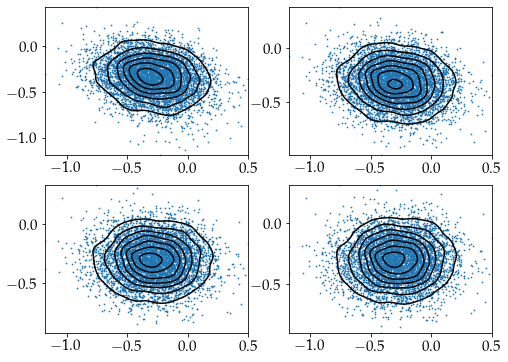

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(8,6))

polar_frac = 0

a_ = s_a * a + np.log10(angle)
# b_torus = s_b * b + np.log10(1 - polar_frac) - np.log10(angle)
b_torus = s_b * b + np.log10(1 - polar_frac) + np.log10(1-angle)
b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
b_ = np.log10(10 ** b_torus + 10 ** b_polar)
frac = 10**np.mean(b_polar - b_)

scatter_with_kde(a_, b_, ax=axs[0,0])


polar_frac = 0.2

a_ = s_a * a + np.log10(angle)
# b_torus = s_b * b + np.log10(1 - polar_frac) - np.log10(angle)
b_torus = s_b * b + np.log10(1 - polar_frac) + np.log10(1-angle)
b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
b_ = np.log10(10 ** b_torus + 10 ** b_polar)
frac = 10**np.mean(b_polar - b_)

scatter_with_kde(a_, b_, ax=axs[0,1])


polar_frac = 0.4

a_ = s_a * a + np.log10(angle)
# b_torus = s_b * b + np.log10(1 - polar_frac) - np.log10(angle)
b_torus = s_b * b + np.log10(1 - polar_frac) + np.log10(1-angle)
b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
b_ = np.log10(10 ** b_torus + 10 ** b_polar)
frac = 10**np.mean(b_polar - b_)

scatter_with_kde(a_, b_, ax=axs[1,0])


polar_frac = 0.5

a_ = s_a * a + np.log10(angle)
# b_torus = s_b * b + np.log10(1 - polar_frac) - np.log10(angle)
b_torus = s_b * b + np.log10(1 - polar_frac) + np.log10(1-angle)
b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
b_ = np.log10(10 ** b_torus + 10 ** b_polar)
frac = 10**np.mean(b_polar - b_)

scatter_with_kde(a_, b_, ax=axs[1,1])

In [28]:
@np.vectorize
def frac2corrfrac(polar_frac):
    a_ = s_a * a + np.log10(angle)
    # b_torus = s_b * b + np.log10(1 - polar_frac) - np.log10(angle)
    b_torus = s_b * b + np.log10(1 - polar_frac) + np.log10(1-angle)
    b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
    b_ = np.log10(10 ** b_torus + 10 ** b_polar)
    frac = 10**np.mean(b_polar - b_)
    return [np.corrcoef(a_, b_)[0, 1], frac]

In [29]:
from scipy.interpolate import CubicSpline

f = np.linspace(0,1)
res = np.array([frac2corrfrac(f) for f in f])
frac = res[:,1]
corr = res[:,0]
frac2corr0 = CubicSpline(frac, corr)

<ipython-input-28-ced79b81b086>:6: RuntimeWarning: divide by zero encountered in log10
  b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
<ipython-input-28-ced79b81b086>:5: RuntimeWarning: divide by zero encountered in log10
  b_torus = s_b * b + np.log10(1 - polar_frac) + np.log10(1-angle)


In [30]:
corr2frac0 = CubicSpline(corr, frac)
frac0 = corr2frac0(oiii_corrs)

In [16]:
np.savetxt("frac0", frac0)

In [26]:
corr2frac_x = CubicSpline(corr, frac)
frac_x = corr2frac_x(cors_x)

In [18]:
corr2frac_s = CubicSpline(corr, frac)
frac_s = corr2frac_s(cors_s)

In [19]:
corr2frac_unbias = CubicSpline(corr, frac)
frac_unbias = corr2frac_unbias(cors_unbias)

In [39]:
dust, polar = np.loadtxt("nir")

In [42]:
polar

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00643017, 0.02104454, 0.03756217, 0.05505591, 0.072705  ,
       0.08993955, 0.10643288, 0.12191904, 0.13617133, 0.14909745,
       0.16077131, 0.17128774, 0.18074871, 0.18924934, 0.1967913 ,
       0.20365605, 0.20992062, 0.2156396 , 0.22090825, 0.22582862,
       0.23177248, 0.23725979, 0.24433303, 0.25413784, 0.26460196,
       0.27530949, 0.27769041, 0.27476804, 0.26957004, 0.26755467,
       0.2654527 , 0.26989313, 0.27615311, 0.28370897, 0.29160298,
       0.2986819 , 0.30511114, 0.31247135, 0.31971019, 0.32442364])

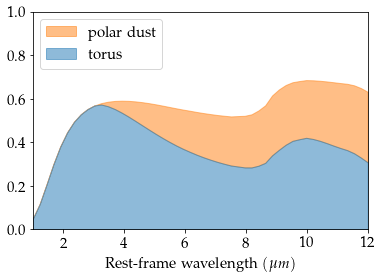

In [40]:
plt.fill_between(np.linspace(1,12), dust - polar, dust, color="tab:orange", alpha=0.5, label="polar dust")
plt.fill_between(np.linspace(1,12), dust - polar, 0, color="tab:blue", alpha=0.5, label="torus")

plt.xlim((1,12))
plt.ylim((0,1))
plt.xlabel("Rest-frame wavelength $(\mu m)$")
plt.legend(loc="upper left")

In [22]:
from scipy.integrate import trapz

trapz(polar, x=np.linspace(1,12)) / trapz(dust, x=np.linspace(1,12))

0.30061368515665543

In [77]:
def graybody(A, T):
    return np.vectorize(
        lambda l: A * (1 - np.exp(-(200/l)**1.6)) * (1/l)**3/(np.exp(2289.89/(l * T))-1)
        )

In [71]:
f(50)

array(0.07999183)

In [94]:
from labellines import labelLine, labelLines

In [124]:
frac_b_hc, frac_b_hc_high, frac_b_hc_low = np.loadtxt("case_b_hc")
frac_b_x, frac_b_x_high, frac_b_x_low = np.loadtxt("case_b_x")
frac_b_s, frac_b_s_high, frac_b_s_low = np.loadtxt("case_b_s")

In [144]:
frac_b_hc[-1]

0.2327043713417564

In [146]:
frac0[-1]

0.517994626293906

In [145]:
from scipy import integrate

In [154]:
total = integrate.trapz(dust/np.linspace(1, 12), x=np.linspace(1, 12))

In [155]:
integrate.trapz(tmp/np.linspace(1, 12), x=np.linspace(1, 12)) / total

0.09791832101658604

In [156]:
integrate.trapz(polar/np.linspace(1, 12), x=np.linspace(1, 12)) / total

0.19992785813117708

In [170]:
# tmp = frac_b_hc * dust
# tmp[:8] = 0
np.savetxt("/Users/wul/Desktop/tmp", polar)

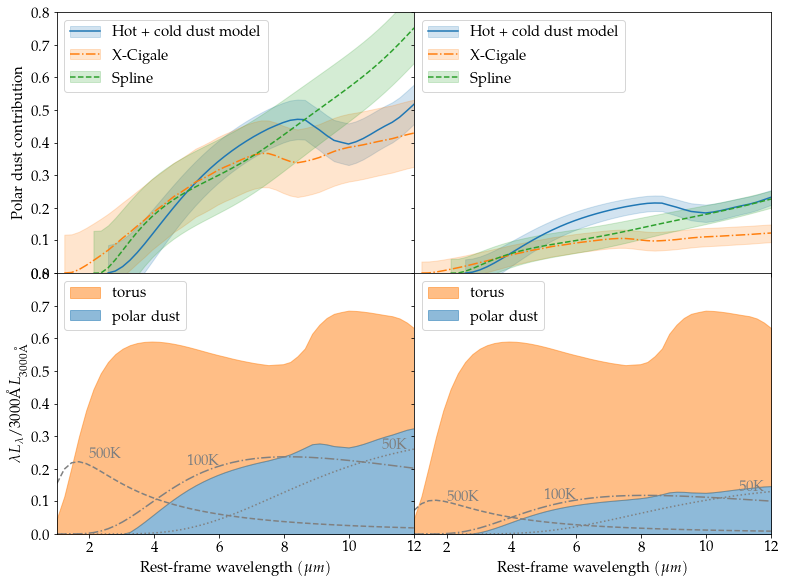

In [153]:
fig, axs = plt.subplots(2, 2, figsize=(12.8, 9.6), sharex=True, sharey=True)

line1, = axs[0, 0].plot(np.linspace(1, 12)[7:], frac0[7:], label="Hot + cold dust model")
err1 = axs[0, 0].fill_between(np.linspace(1, 12)[7:], 
    corr2frac0(oiii_corrs-cors_std)[7:], 
    corr2frac0(oiii_corrs+cors_std)[7:], color="tab:blue", alpha=0.2)

line2, = axs[0, 0].plot(np.linspace(1, 12)[1:], frac_x[1:], linestyle="-.", label="X-Cigale")
err2 = axs[0, 0].fill_between(np.linspace(1, 12)[1:], 
    corr2frac_x(cors_x-cors_x_err)[1:], 
    corr2frac_x(cors_x+cors_x_err)[1:], color="tab:orange", alpha=0.2)

line3, = axs[0, 0].plot(np.linspace(1, 12)[5:], frac_s[5:], linestyle="--", label="Spline")
err3 = axs[0, 0].fill_between(np.linspace(1, 12)[5:], 
    corr2frac_s(cors_s-cors_s_err)[5:], 
    corr2frac_s(cors_s+cors_s_err)[5:], color="tab:green", alpha=0.2)

axs[0, 0].legend([
    (line1, err1), (line2, err2), (line3, err3)
], ["Hot + cold dust model", "X-Cigale", "Spline"])

axs[0, 0].set_ylabel("Polar dust contribution")


line1, = axs[0, 1].plot(np.linspace(1, 12)[7:], frac_b_hc[7:], label="Hot + cold dust model")
err1 = axs[0, 1].fill_between(np.linspace(1, 12)[7:], 
    frac_b_hc_high[7:], 
    frac_b_hc_low[7:], color="tab:blue", alpha=0.2)

line2, = axs[0, 1].plot(np.linspace(1, 12)[1:], frac_b_x[1:], linestyle="-.", label="X-Cigale")
err2 = axs[0, 1].fill_between(np.linspace(1, 12)[1:], 
    frac_b_x_high[1:], 
    frac_b_x_low[1:], color="tab:orange", alpha=0.2)

line3, = axs[0, 1].plot(np.linspace(1, 12)[5:], frac_b_s[5:], linestyle="--", label="Spline")
err3 = axs[0, 1].fill_between(np.linspace(1, 12)[5:], 
    frac_b_s_high[5:], 
    frac_b_s_low[5:], color="tab:green", alpha=0.2)

axs[0, 1].legend([
    (line1, err1), (line2, err2), (line3, err3)
], ["Hot + cold dust model", "X-Cigale", "Spline"], loc="upper left")


xx = np.linspace(1,12)

axs[1, 1].plot(xx, graybody(10000, 50)(xx), color="gray", linestyle="dotted")
axs[1, 1].text(xx[-1]-1, graybody(10000, 50)(xx)[-1], "50K", color="gray")
axs[1, 1].plot(xx, graybody(1000, 100)(xx), color="gray", linestyle="-.")
axs[1, 1].text(xx[-1]-7, graybody(12000, 50)(xx)[-1] -0.05, "100K", color="gray")
axs[1, 1].plot(xx, graybody(7, 500)(xx), color="gray", linestyle="--")
axs[1, 1].text(xx[-1]-10, graybody(10000, 50)(xx)[-1]-0.03, "500K", color="gray")


tmp = frac_b_hc * dust
tmp[:7] = 0
axs[1, 1].fill_between(xx, tmp, dust, color="tab:orange", alpha=0.5, label="torus")
axs[1, 1].fill_between(xx, tmp, 0, color="tab:blue", alpha=0.5, label="polar dust")


axs[1, 1].set_xlabel("Rest-frame wavelength $(\mu m)$")
axs[1, 1].legend(loc="upper left")


xx = np.linspace(1,12)

axs[1, 0].plot(xx, graybody(20000, 50)(xx), color="gray", linestyle="dotted")
axs[1, 0].text(xx[-1]-1, graybody(20000, 50)(xx)[-1], "50K", color="gray")
axs[1, 0].plot(xx, graybody(2000, 100)(xx), color="gray", linestyle="-.")
axs[1, 0].text(xx[-1]-7, graybody(20000, 50)(xx)[-1] -0.05, "100K", color="gray")
axs[1, 0].plot(xx, graybody(15, 500)(xx), color="gray", linestyle="--")
axs[1, 0].text(xx[-1]-10, graybody(20000, 50)(xx)[-1]-0.03, "500K", color="gray")

axs[1, 0].fill_between(xx, polar, dust, color="tab:orange", alpha=0.5, label="torus")
axs[1, 0].fill_between(xx[7:], polar[7:], 0, color="tab:blue", alpha=0.5, label="polar dust")

axs[1, 0].set_xlim((1,12))
axs[1, 0].set_ylim((0,0.8))
axs[1, 0].set_xlabel("Rest-frame wavelength $(\mu m)$")
axs[1, 0].set_ylabel("$\lambda L_\lambda / 3000\mathrm{\AA} L_{3000\mathrm{\AA}}$")
axs[1, 0].legend(loc="upper left")

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('/Users/wul/Desktop/polar3.pdf', bbox_inches="tight")

In [37]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 15
})

In [32]:
frac_, frac__up, frac__low = np.loadtxt("frac_uncorrelated")

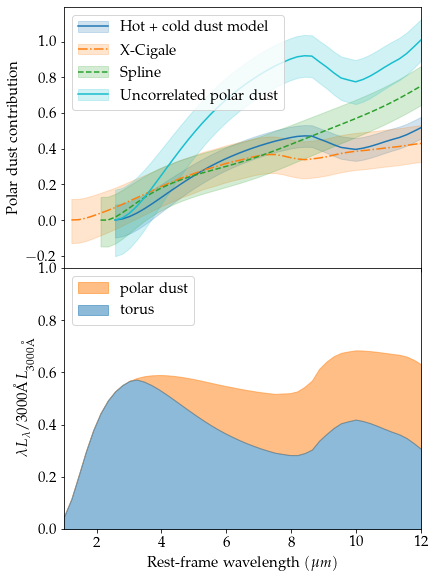

In [38]:
fig, axs = plt.subplots(2, 1, figsize=(6.4, 9.6), sharex=True)

line1, = axs[0].plot(np.linspace(1, 12)[7:], frac0[7:], label="Hot + cold dust model")
err1 = axs[0].fill_between(np.linspace(1, 12)[7:], 
    corr2frac0(oiii_corrs-cors_std)[7:], 
    corr2frac0(oiii_corrs+cors_std)[7:], color="tab:blue", alpha=0.2)

line2, = axs[0].plot(np.linspace(1, 12)[1:], frac_x[1:], linestyle="-.", label="X-Cigale")
err2 = axs[0].fill_between(np.linspace(1, 12)[1:], 
    corr2frac_x(cors_x-cors_x_err)[1:], 
    corr2frac_x(cors_x+cors_x_err)[1:], color="tab:orange", alpha=0.2)

line3, = axs[0].plot(np.linspace(1, 12)[5:], frac_s[5:], linestyle="--", label="Spline")
err3 = axs[0].fill_between(np.linspace(1, 12)[5:], 
    corr2frac_s(cors_s-cors_s_err)[5:], 
    corr2frac_s(cors_s+cors_s_err)[5:], color="tab:green", alpha=0.2)

line4, = axs[0].plot(np.linspace(1, 12)[7:], frac_[7:], color="tab:cyan", label="Uncorrelated polar dust")
err4 = axs[0].fill_between(np.linspace(1, 12)[7:], 
    frac__low[7:], frac__up[7:], color="tab:cyan", alpha=0.2)

axs[0].legend([
    (line1, err1), (line2, err2), (line3, err3), (line4, err4)
], ["Hot + cold dust model", "X-Cigale", "Spline", "Uncorrelated polar dust"])

axs[0].set_ylabel("Polar dust contribution")


axs[1].fill_between(np.linspace(1,12), dust - polar, dust, color="tab:orange", alpha=0.5, label="polar dust")
axs[1].fill_between(np.linspace(1,12), dust - polar, 0, color="tab:blue", alpha=0.5, label="torus")

axs[1].set_xlim((1,12))
axs[1].set_ylim((0,1))
axs[1].set_xlabel("Rest-frame wavelength $(\mu m)$")
axs[1].set_ylabel("$\lambda L_\lambda / 3000\mathrm{\AA} L_{3000\mathrm{\AA}}$")
axs[1].legend(loc="upper left")

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('/Users/wul/Desktop/polar4.pdf', bbox_inches="tight")

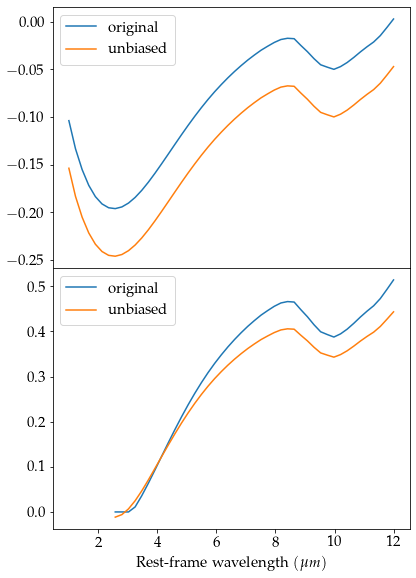

In [190]:
fig, axs = plt.subplots(2, 1, figsize=(6.4, 9.6), sharex=True)

axs[0].plot(np.linspace(1, 12), oiii_corrs, label="original")
axs[0].plot(np.linspace(1, 12), cors_unbias, label="unbiased")
axs[0].legend()

axs[1].plot(np.linspace(1, 12)[7:], frac0[7:], label="original")
axs[1].plot(np.linspace(1, 12)[7:], frac_unbias[7:], label="unbiased")
axs[1].legend()
axs[1].set_xlabel("Rest-frame wavelength $(\mu m)$")

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('/Users/wul/Desktop/polar4.pdf', bbox_inches="tight")

In [145]:
frac0[:6] = 0
frac0[np.where(frac0 < 0)] = 0

frac_x[0] = 0
frac_x[np.where(frac0 < 0)] = 0

frac_s[:4] = 0
frac_s[np.where(frac0 < 0)] = 0

np.savetxt("frac", [frac0, frac_x, frac_s])

In [112]:
[wvl_idx, pfx] = np.loadtxt("../src/pfx")

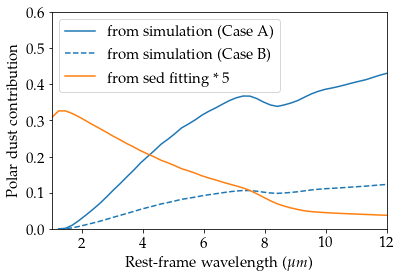

In [143]:
fig, ax1 = plt.subplots()

ax1.plot(np.linspace(1, 12)[1:], frac_x[1:], label="from simulation (Case A)")
ax1.plot(np.linspace(1, 12)[1:], frac_b_x[1:], label="from simulation (Case B)", color="tab:blue", linestyle="--")
ax1.set_ylabel('''Polar dust contribution''')
ax1.set_xlabel('''Rest-frame wavelength ($\mu m$)''')
ax1.set_ylim((0,0.6))
ax1.set_xlim((1,12))

ax1.plot(wvl_idx, pfx * 5, color="tab:orange", label="from sed fitting * 5")


ax1.legend(loc="upper left")

plt.savefig("/Users/wul/Desktop/pfx.pdf", bbox_inches="tight")

In [19]:
@np.vectorize
def frac2corr(polar_frac):
    a_ = s_a * a + np.log10(angle)
    b_torus = s_b * b + np.log10(1 - angle)
    b_polar = s_b * b + np.log10(angle)
    b_ = np.log10(10 ** b_torus * (1 - polar_frac) + 10 ** b_polar * polar_frac)
    return np.corrcoef(a_, b_)[0, 1]

In [8]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 15
})

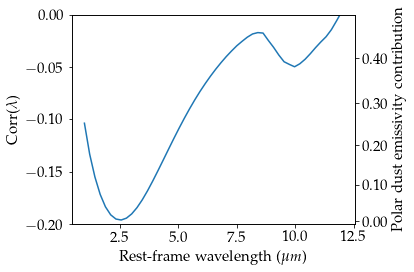

In [20]:
fig, ax1 = plt.subplots()

ax1.plot(np.linspace(1, 12), oiii_corrs)
ax1.set_ylim((-0.2,0))
ax1.set_ylabel('''Corr($\lambda$)''')
ax1.set_xlabel('''Rest-frame wavelength ($\mu m$)''')

ax2 = ax1.twinx()
ax2.set_yticks([frac2corr(f) for f in np.arange(0, 0.6, 0.1)])
ax2.set_yticklabels(["{:10.2f}".format(f) for f in np.arange(0, 0.6, 0.1)])
ax2.set_ylim((-0.2,0))
ax2.set_ylabel('''Polar dust emissivity contribution''')

plt.tight_layout()

plt.savefig('/Users/wul/Desktop/polar.pdf')
# for f in np.arange(0, 0.6, 0.1):
#     plt.axhline(frac2corr(f), c=color(1 - f))
#     plt.text(12, frac2corr(f), "{:10.2f}".format(f))

In [21]:
@np.vectorize
def frac2corrfrac(polar_frac):
    a_ = s_a * a + np.log10(angle)
    b_torus = s_b * b + np.log10(1 - polar_frac) - np.log10(angle)
    b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
    b_ = np.log10(10 ** b_torus + 10 ** b_polar)
    frac = 10**np.mean(b_polar - b_)
    return [np.corrcoef(a_, b_)[0, 1], frac]

In [27]:
from scipy.interpolate import CubicSpline

f = np.linspace(0,1)
res = np.array([frac2corrfrac(f) for f in f])
frac = res[:,1]
corr = res[:,0]
frac2corr0 = CubicSpline(frac, corr)

corr2frac0 = CubicSpline(corr, frac)

<ipython-input-21-2b88fbfa72e5>:5: RuntimeWarning: divide by zero encountered in log10
  b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
<ipython-input-21-2b88fbfa72e5>:4: RuntimeWarning: divide by zero encountered in log10
  b_torus = s_b * b + np.log10(1 - polar_frac) - np.log10(angle)


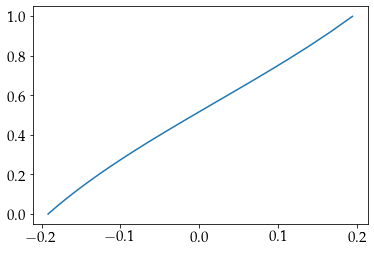

In [26]:
plt.plot(corr, frac)

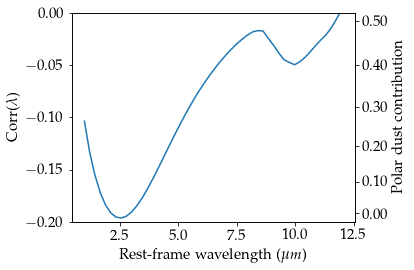

In [23]:
fig, ax1 = plt.subplots()

ax1.plot(np.linspace(1, 12), oiii_corrs)
ax1.set_ylim((-0.2,0))
ax1.set_ylabel('''Corr($\lambda$)''')
ax1.set_xlabel('''Rest-frame wavelength ($\mu m$)''')

ax2 = ax1.twinx()
ax2.set_yticks([frac2corr0(f) for f in np.arange(0, 0.6, 0.1)])
ax2.set_yticklabels(["{:10.2f}".format(f) for f in np.arange(0, 0.6, 0.1)])
ax2.set_ylim((-0.2,0))
ax2.set_ylabel('''Polar dust contribution''')

plt.tight_layout()

plt.savefig('/Users/wul/Desktop/polar1.pdf')

In [24]:
np.max(corr), np.min(corr), np.max(oiii_corrs), np.min(oiii_corrs)

(0.19370684037395577,
 -0.19166906948814558,
 0.0030074530527254935,
 -0.19618814710905794)

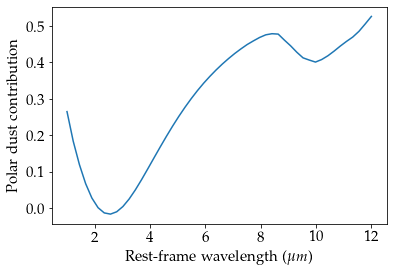

In [32]:
plt.plot(np.linspace(1, 12), corr2frac0(oiii_corrs))
plt.xlabel("Rest-frame wavelength ($\mu m$)")
plt.ylabel("Polar dust contribution")


plt.savefig('/Users/wul/Desktop/polar2.pdf', bbox_inches="tight")

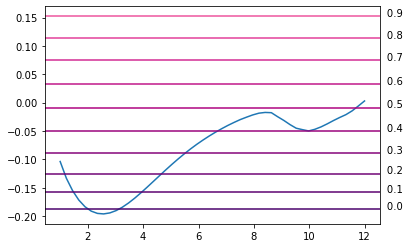

In [77]:
plt.plot(np.linspace(1, 12), oiii_corrs)
for f in np.arange(0, 1., 0.1):
    plt.axhline(frac2corr0(f), c=color(1 - 0.5*f))
    plt.text(12, frac2corr0(f), "{:10.1f}".format(f))

<ipython-input-34-2b88fbfa72e5>:5: RuntimeWarning: divide by zero encountered in log10
  b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)


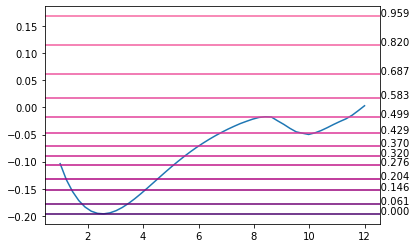

In [45]:
plt.plot(np.linspace(1, 12), oiii_corrs)
for f in [0., 0.2, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]:
    corr, frac = frac2corrfrac(f)
    plt.axhline(corr, c=color(1 - 0.5*f))
    plt.text(12, corr, "{:10.3f}".format(frac))

In [127]:
corr_x_min = np.min(oiii_corrs_x)

In [128]:
corr_x_min

-0.16152721060603728

In [129]:
r = []
for i in range(10):
    r.append(simulate(0.5, 0.1))
r

[-0.15828648335902878,
 -0.14469186648585283,
 -0.1523990169729435,
 -0.1645632979044021,
 -0.15887787571709094,
 -0.15946990223550297,
 -0.16335130720282867,
 -0.15222673629614195,
 -0.15219591997239418,
 -0.17174859521953165]

In [130]:
while True:
    data = gen_data(0.5, 0.1)

    res = opt.minimize(
        lambda s: target(data, *s), 
        [_a_std, _b_std],
        bounds=opt.Bounds(
            [0, 0],
            [np.inf, np.inf]
        )
    )

    s_a, s_b = res.x
    a, b, angle = data
    c = np.corrcoef(s_a * a + np.log10(angle), s_b * b - np.log10(angle))[0, 1]

    if np.abs(c - corr_x_min) < 1e-3:
        break

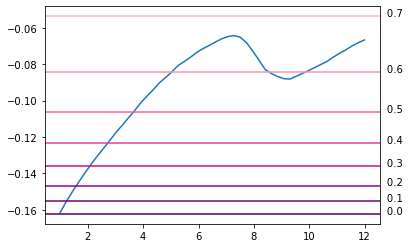

In [131]:
plt.plot(np.linspace(1, 12), oiii_corrs_x)
for f in np.arange(0, 0.8, 0.1):
    plt.axhline(frac2corr(f), c=color(1 - f))
    plt.text(12, frac2corr(f), "{:10.1f}".format(f))